In [18]:
import pandas
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import random

In [2]:
training_data = pandas.read_csv("train.csv")

In [3]:
print(training_data)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

In [4]:
training_data = training_data.values

x_train = training_data[:, 1:]
y_train = training_data[:, 0]

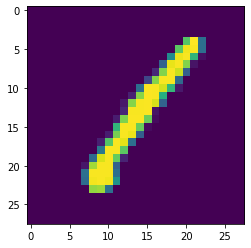

In [5]:
plt.imshow(x_train[0].reshape(28,28))

In [36]:
model = tf.keras.Sequential([
    layers.Dense(50, activation="relu", input_dim=784),
    layers.Dense(50, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [37]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])

In [38]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1313/1313 [==============================] - 3s 2ms/step - loss: 1.9541 - accuracy: 0.7955
Epoch 2/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4518 - accuracy: 0.8907
Epoch 3/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3249 - accuracy: 0.9154
Epoch 4/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2815 - accuracy: 0.9257
Epoch 5/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2453 - accuracy: 0.9345
Epoch 6/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2268 - accuracy: 0.9395
Epoch 7/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1902 - accuracy: 0.9481
Epoch 8/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1699 - accuracy: 0.9534
Epoch 9/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1608 - accuracy: 0.9549
Epoch 10/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.143

In [9]:
test_data = pandas.read_csv("test.csv")

x_test = test_data.values

print(x_test[0].shape)

(784,)


Prediction:  1


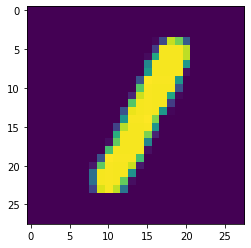

In [115]:
random_index = random.randint(0, test_data.shape[0]-1)

print("Prediction: ", np.argmax(model.predict(np.array([x_test[random_index]]))))
plt.imshow(x_test[random_index].reshape(28,28))